In [2]:
#standard ds imports
import pandas as pd
import numpy as np

#viz and stats
import matplotlib.pyplot as plt
%matplotlib widget
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

import wrangle_zillow
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

In [3]:
zillow = pd.read_csv('zillow.csv')

In [10]:
zillow = zillow.drop('Unnamed: 0', axis =1 )

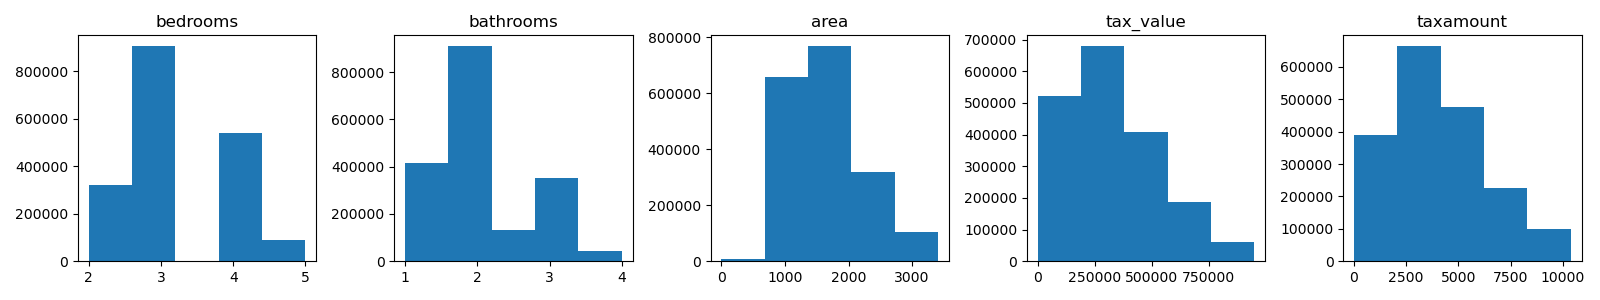

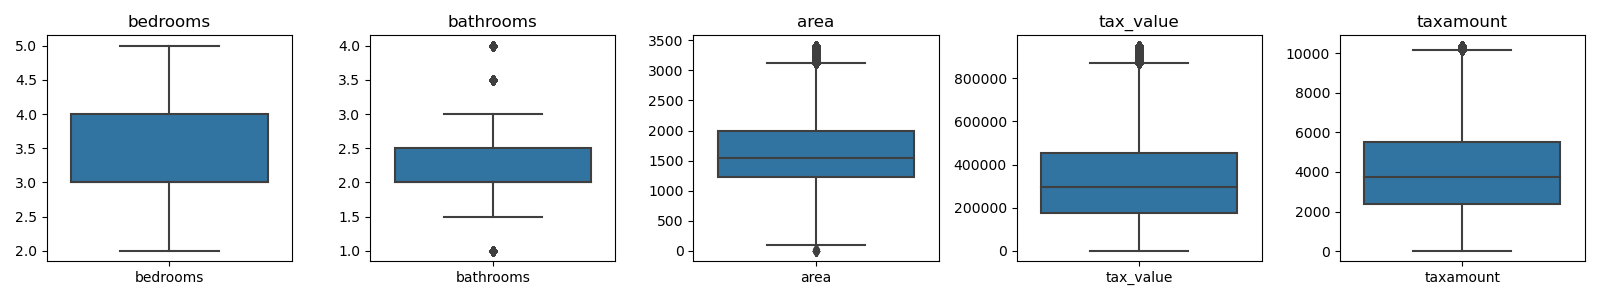

In [11]:
train, validate, test = wrangle_zillow.prepare_zillow(zillow)

In [12]:
train.shape, validate.shape, test.shape

((1038959, 7), (445269, 7), (371057, 7))

In [14]:
train.columns

Index(['bedrooms', 'bathrooms', 'area', 'tax_value', 'year_built', 'taxamount',
       'fips'],
      dtype='object')

In [15]:
train.dtypes

bedrooms      float64
bathrooms     float64
area          float64
tax_value     float64
year_built    float64
taxamount     float64
fips           object
dtype: object

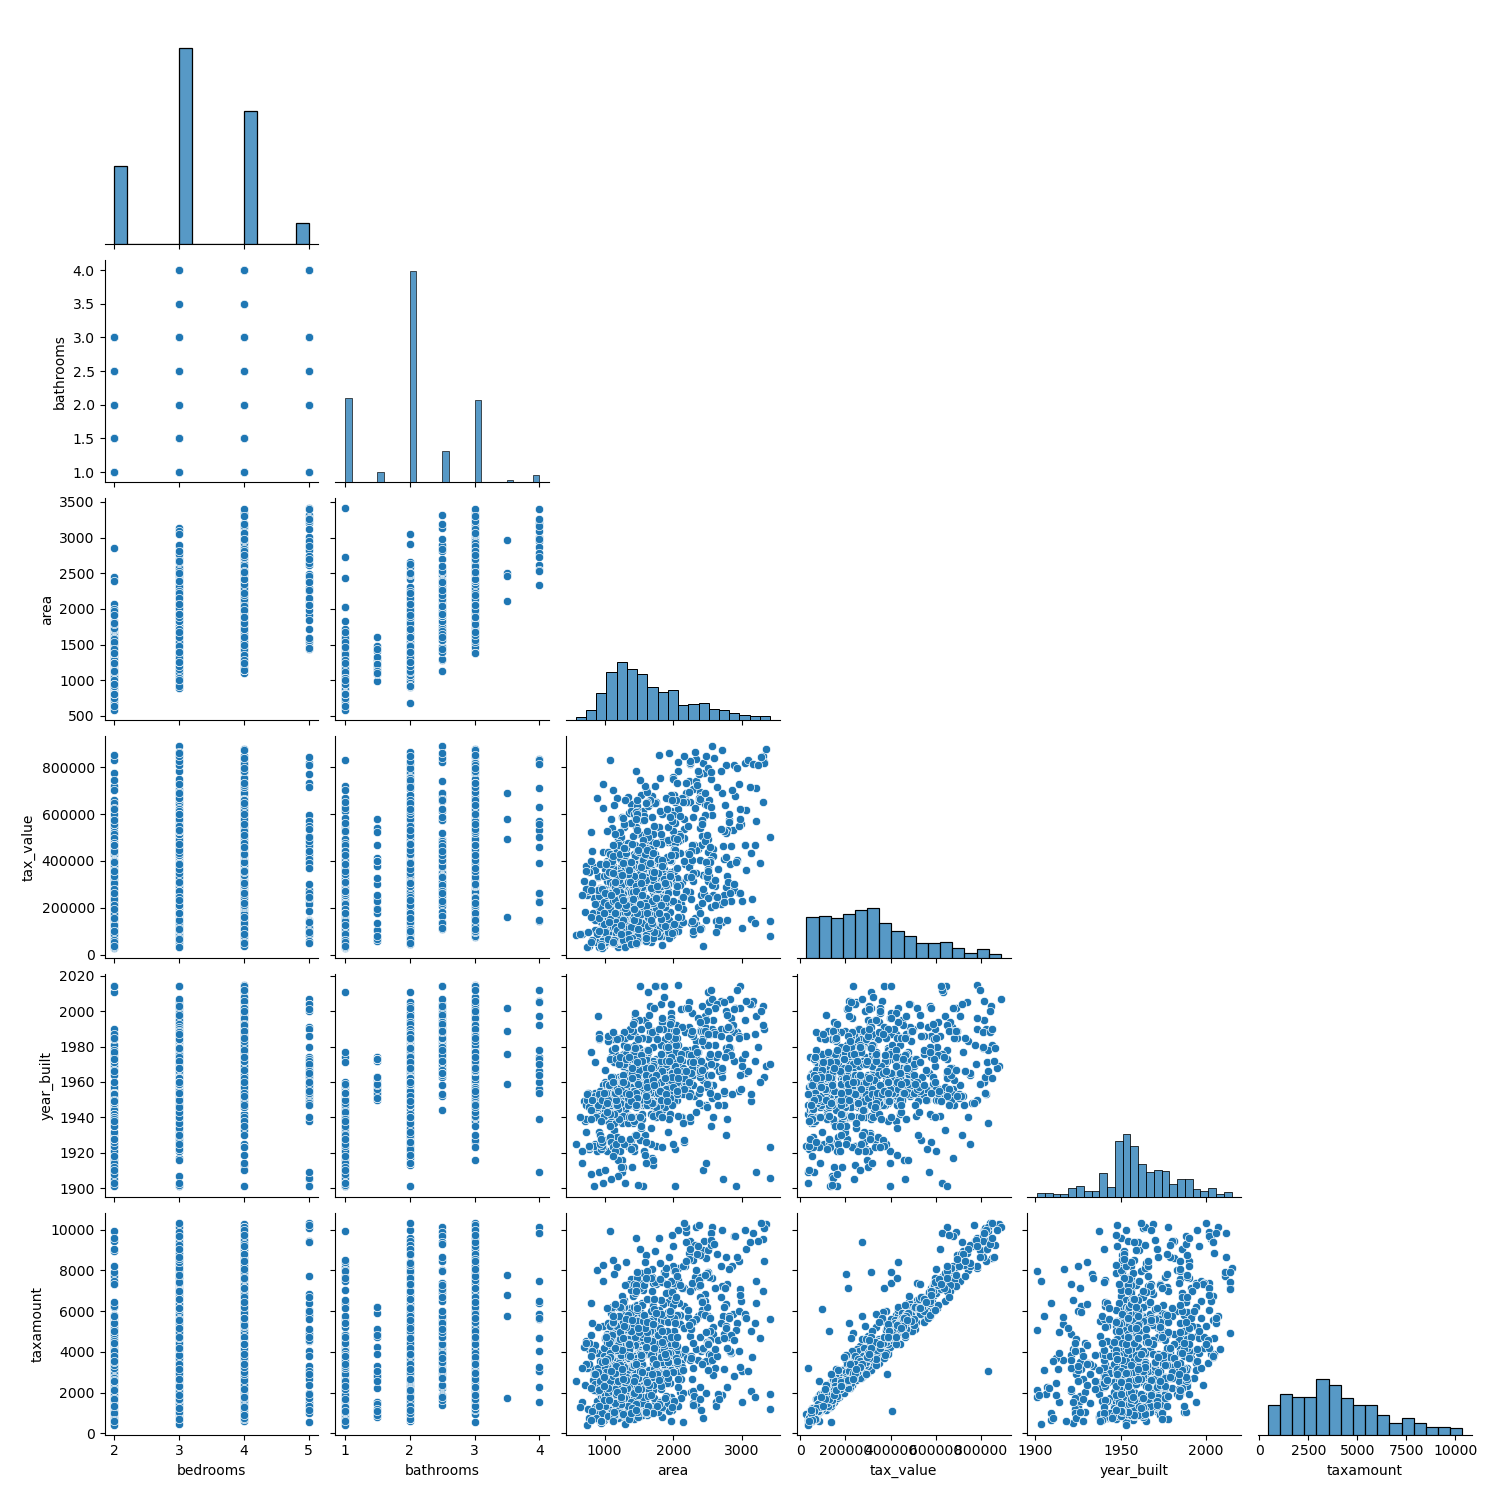

In [21]:
sns.pairplot(train.sample(1000).drop(columns=['fips']), corner=True)
plt.show()